## Extended Figure 4

This manuscript generates extended data figure 4 and relavent data of the paper. 

Kexin Dong

Date created: May 24, 2024  

Last updated: Oct 20, 2025

In [1]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42 
mpl.rcParams['text.usetex'] = False 
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/Users/kexindong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kexindong/Library/Python/3.9/lib/python/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [4]:
df_input = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input_original.csv')
df_input_sub = df_input[(df_input['gene_name_h']=='KIT')]

In [5]:
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned_v3.csv')

In [6]:
df_kit_all = df_binded[(df_binded['gene_name_h']=='KIT') & (df_binded['classification_h']=='Missense')]

In [7]:
df_kit_all = df_kit_all.reset_index(drop=True)
df_kit_aacr = df_kit_all[df_kit_all['Database']=='AACR']
df_kit_aacr = df_kit_aacr[df_kit_aacr['ID_human'].isin(df_input_sub['ID'])]
df_kit_aacr = df_kit_aacr.reset_index(drop=True)
# del bf_binded

In [8]:
df_input_sub = df_input_sub.rename(columns = {'ID':'ID_human'})
df_freq = pd.merge(df_input_sub, df_kit_aacr, on=['gene_name_h', 'tx_id_h', 'start_h', 'end_h', 'ref_seq_h', 'alt_seq_h',
       'type_h','ID_human'], how = 'left')
df_freq_all = pd.merge(df_input_sub, df_kit_all, on='ID_human', how = 'right')

In [9]:
len(df_freq_all)

4159

In [10]:
len(df_freq)

2943

In [11]:
color_dict_h2m = dict({0:'tab:orange',
                  1:'tab:green',
                  4:'tab:purple'})

def search_loc(s):
    match = re.search(r'(\d+)', s)
    if match:
        number = match.group(1)
        return int(number)
    else:
        return None

## Extended Figure 4a 
Distribution of AlphaMissense scores for KIT missense mutations under different thresholds of flank size.

In [2]:
file_path = '/Users/kexindong/Documents/GitHub/Database/Pathogenecity/AlphaMIssense/AlphaMissense_aa_substitutions.tsv'
df_am = pd.read_csv(file_path, sep = '\t',comment='#')
df_kit_am = df_am[df_am['uniprot_id']=='P10721'].reset_index(drop=True)
df_kit_am = df_kit_am.drop('uniprot_id',axis=1)
df_kit_am.columns=['HGVSp_h','am_pathogenicity','am_class']

In [12]:
df_merged_all = df_kit_all
df_merged_all = df_merged_all[df_merged_all['classification_h'] == 'Missense'].reset_index(drop=True)
df_merged_all['loc_h'] = [search_loc(s) for s in  df_merged_all['HGVSp_h']]
# df_merged_all['color'] = [color_dict[x] for x in df_merged_all['am_class']]
df_merged_all['color_h2m'] = [color_dict_h2m[x] for x in df_merged_all['class']]

In [13]:
df_h2m = df_merged_all.drop_duplicates(subset='ID_human').reset_index(drop=True)
df_h2m = pd.merge(df_h2m, df_kit_am, how='left').dropna(subset='am_class').reset_index(drop=True)

In [14]:
color_dict_am = dict({
    'pathogenic':'darkred',
    'benign':'darkblue',
    'ambiguous':'grey'
})
df_h2m['color'] = [color_dict_am[x] for x in df_h2m['am_class']]

In [15]:
list_density = []
for fs in [20,10,4,0]:
    df_merged = df_h2m[df_h2m['flank_size'] >= fs].reset_index(drop=True)
    df_merged = df_merged[df_merged['status']==True]
    df_merged = df_merged[['ID_human','HGVSp_h','am_pathogenicity','am_class','loc_h']]
    df_merged['fs'] = f'FS = {fs}'
    list_density.append(df_merged)
df_density = pd.concat(list_density)

In [16]:
df_density = df_density.reset_index(drop=True)

In [17]:
df_density = df_density.sort_values(by ='fs', ascending=False)

In [18]:
df_density['F'] = [int(x.split(' ')[-1]) for x in df_density['fs']]

In [19]:
list(df_density['F'].unique())[3]

0

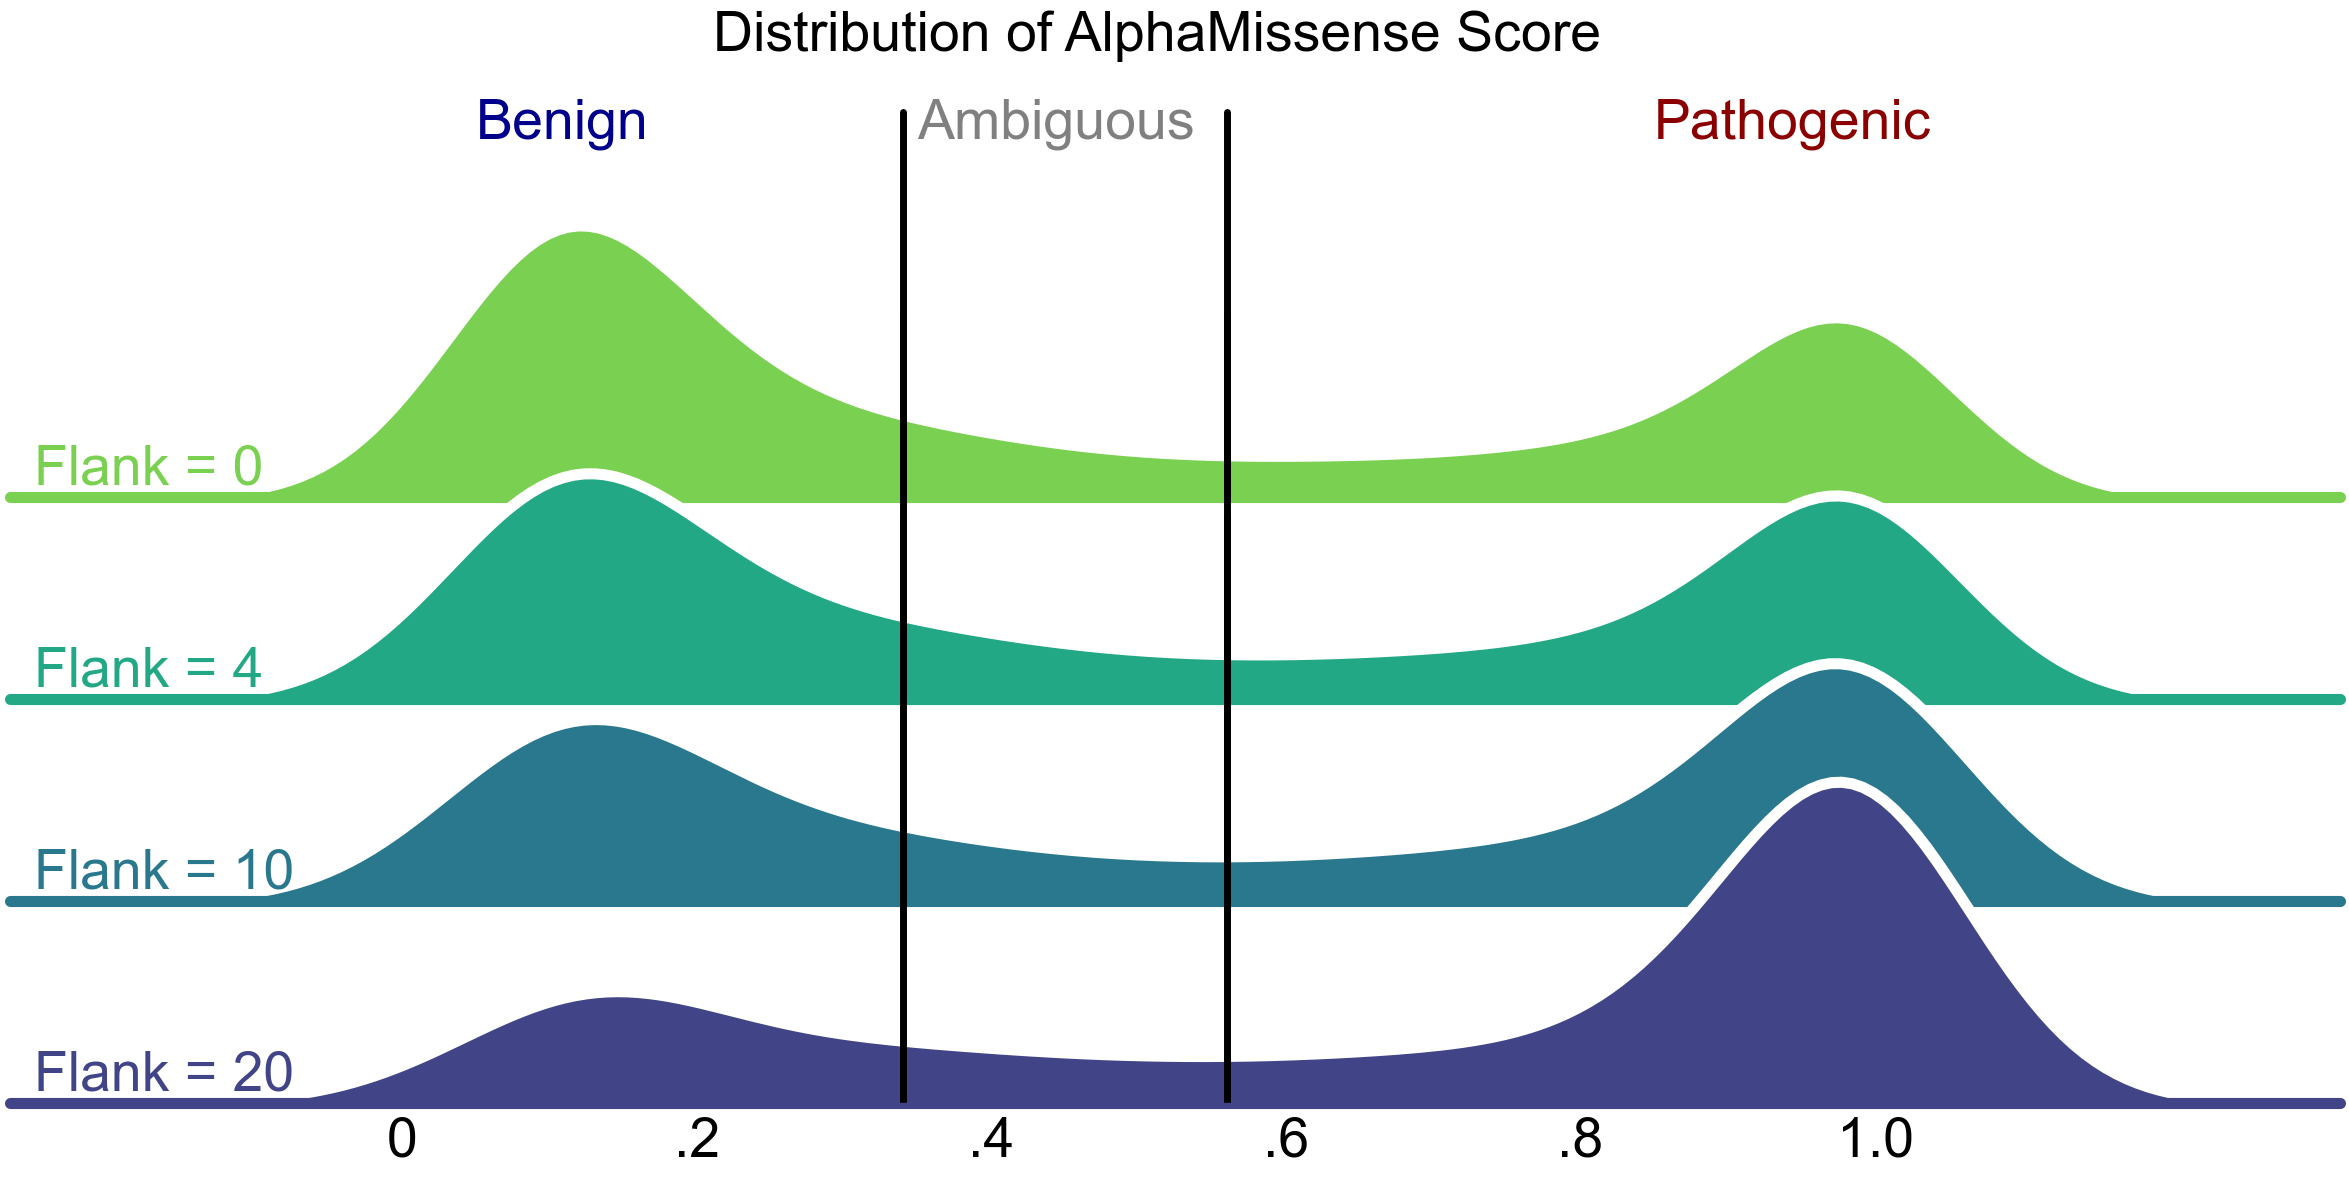

In [ ]:
# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df_density, row='F', hue='F', aspect=8, height=3, palette='viridis_r', hue_order = [0,4,10,20])
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'am_pathogenicity',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'am_pathogenicity', 
      bw_adjust=1, clip_on=False, alpha=1,
      color="w", lw=8)

g.map(plt.axhline, y=0,alpha=1,
      lw=8, clip_on=False)

for i, ax in enumerate(g.axes.flat):
    ax.text(-.25, .1, [f'Flank = {x}' for x in [0,4,10,20]][i],
            fontsize=40,alpha=1,
            color=ax.lines[-1].get_color())
    ax.set_xlabel('')
    ax.set_ylabel('')
    boundaries = [.34,.56]
    if i == 0:
            annot = pd.DataFrame({
      'x': [.85,.05,.35],
      'y': [2.8]*3,
      'text': list(['Pathogenic','Benign','Ambiguous']),
      'color': list(color_dict_am.values())
      })
            for point in range(0,len(annot)):
                 ax.text(annot.x[point], annot.y[point], annot.text[point], color = annot.color[point],horizontalalignment='left', size=40)
    for bound in boundaries:
      ax.plot([bound, bound], [0, 3], linewidth=5, linestyle='-', color='black')

plt.xticks([0,.2,.4,.6,.8,1],
           labels=['0','.2','.4','.6','.8','1.0'], 
           fontsize = 40,
           color = ax.lines[-1].get_color())
plt.suptitle('Distribution of AlphaMissense Score',
           fontsize = 40,
           color = 'black')

g.map(plt.axhline, y=0, lw=1, clip_on=False)            
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.5)
# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig('figures/ext_4a.pdf', bbox_inches='tight')
plt.show()

## Extended Figure 4b

Scatter plot of AlphaMissense scores of all KIT missense mutations in H2M Database colored by AlphaMissense pathogenicity and H2M modeling, with no flank size limit or flank size ≥ 20.

In [23]:
df_merged_all.to_csv('/Users/kexindong/Documents/GitHub/Output/df_merged_all',index=False)

In [24]:
df_merged_all = df_kit_all
df_merged_all = df_merged_all[df_merged_all['classification_h'] == 'Missense'].reset_index(drop=True)
df_merged_all['loc_h'] = [search_loc(s) for s in  df_merged_all['HGVSp_h']]
# df_merged_all['color'] = [color_dict[x] for x in df_merged_all['am_class']]
df_merged_all['color_h2m'] = [color_dict_h2m[x] for x in df_merged_all['class']]
df_merged_all = df_merged_all.drop_duplicates(subset='ID_human').reset_index(drop=True)

In [25]:
df_merged_all = pd.merge(df_merged_all, df_kit_am, how='left').dropna(subset='am_class').reset_index(drop=True)
df_merged_all['color'] = [color_dict_am[x] for x in df_merged_all['am_class']]

In [26]:
t = ['IG','Trans-/Juxta-membrane','Kinase']
def get_class_region(x):
    t = ['IG','Trans-/Juxta-membrane','Kinase']
    if x <= 507:
        return t[0]
    elif x<= 589:
        return t[1]
    else:
        return t[2]
df_merged_all['region'] = [get_class_region(x) for x in df_merged_all['loc_h']]
color_dict_region = dict(zip(t, ['tab:green','tab:orange','tab:purple']))
df_merged_all['color_region'] = [color_dict_region[x] for x in df_merged_all['region']]

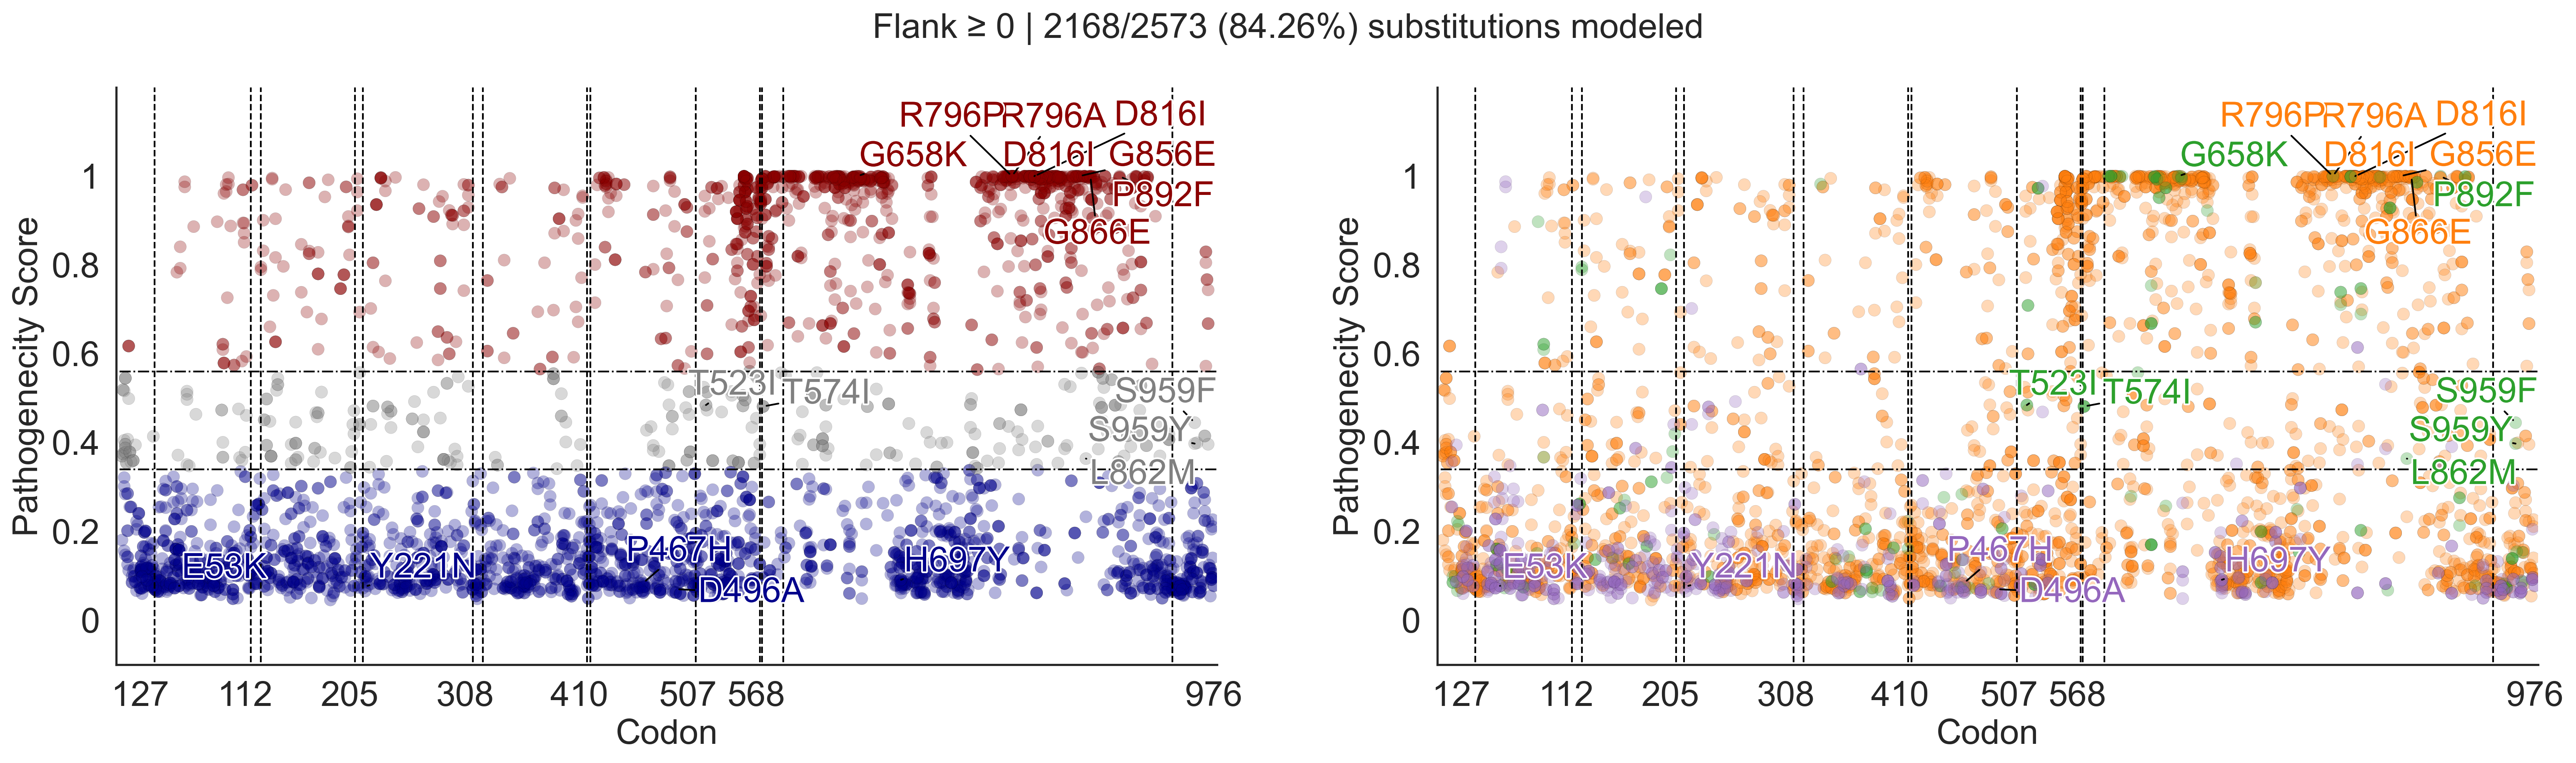

11 [-0.05563247  0.4066086 ]
12 [0.64183211 0.8721113 ]
0 [ 0.92519234 -0.53831628]
2 [-0.26142537 -0.96891046]
11 [0.98015787 0.86086753]
12 [-0.10672132  0.71768884]
0 [-0.31657433  0.04309126]
2 [ 0.93622054 -0.10238757]


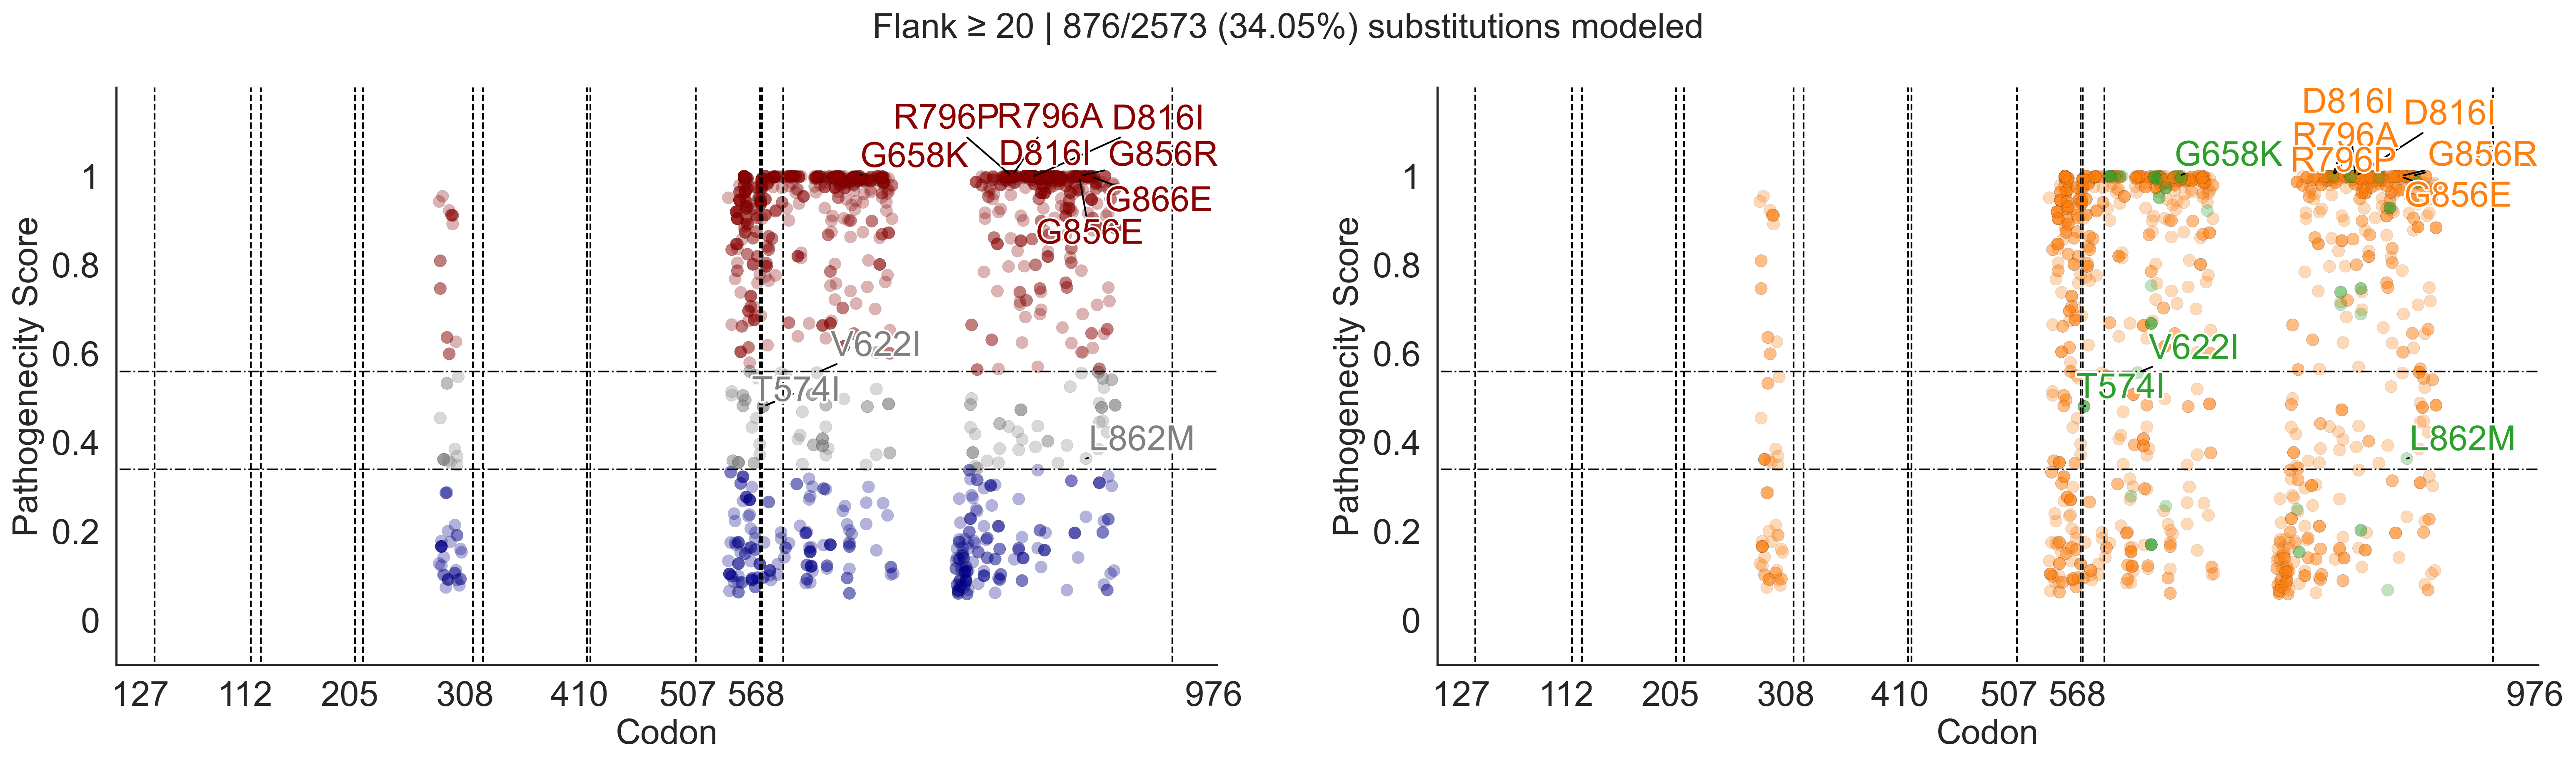

In [27]:
for fs in [0,20]:
    df_merged = df_merged_all[df_merged_all['flank_size'] >= fs].reset_index(drop=True)
    gene = 'KIT'
    l1 = len(df_merged_all['HGVSp_h'].drop_duplicates())
    l2 = len(df_merged[df_merged['status']==True]['HGVSp_h'].drop_duplicates())
    percent = 100*l2/l1
    bbb1 = df_merged[(df_merged['am_pathogenicity'] >= .99984) & (df_merged['status'] == True)].iloc[:8,:]
    bbb2 = df_merged[(df_merged['am_pathogenicity'] <= .2) & (df_merged['status'] == False)].iloc[:5,:]
    bbb3 = df_merged[(df_merged['class'] == 1) & (df_merged['am_pathogenicity'] <= .6) & (df_merged['am_pathogenicity'] >= .3)].iloc[:5,:]
    # top_2 = df_merged['HGVSp_h'].value_counts().index.to_list()[:2]
    # bbb3 = df_merged[df_merged['HGVSp_h'].isin(top_2)]
    bb2 = pd.concat((bbb1, bbb2,bbb3))

    t = list(bb2['HGVSp_h'])
    x = list(bb2['loc_h'])
    y = list(bb2['am_pathogenicity'])
    c = list(bb2['color'])

    fig, (ax,ax2) = plt.subplots(figsize=(25, 6),nrows=1, ncols=2, dpi = 300)

    g = ax.scatter(data=df_merged, x='loc_h', y='am_pathogenicity',  c = 'color', alpha=.3, s=50, edgecolor='black', linewidths=.1)

    ax.plot([0, 979], [0.56, 0.56], linewidth=1, linestyle='-.', color='black')
    ax.plot([0, 979], [0.34, 0.34], linewidth=1, linestyle='-.', color='black')
    # ax.set_ylim(-6, 6)
    ax.set_xlim(-3, 979)
    ax.set_ylim(-.1, 1.2)
    ax.set_ylabel(f"Pathogenecity Score", fontsize=20)
    ax.set_xlabel("Codon", fontsize=20)

    boundaries = [31,117,126,210,217,315,324,417,420,514,571,573,592,939]
    for bound in boundaries:
        ax.plot([bound, bound], [-6, 6], linewidth=1, linestyle='dashed', color='black')

    texts = [ax.text(x[i], y[i], t[i], fontsize=20, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
    ax.yaxis.set_ticks([0,.2,.4,.6,.8,1])
    ax.yaxis.set_ticklabels([0,0.2,0.4,0.6,0.8,1], size=20, fontweight=100)
    adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    boundaries_ = [1,27,112,205,308,410,507,568,976]
    ax.xaxis.set_ticks(boundaries_)
    ax.xaxis.set_ticklabels(boundaries_, size=20, fontweight=100)
    ax.tick_params(axis='x', which='major', labelsize=20)
    

    c = list(bb2['color_h2m'])
    gg = ax2.scatter(data=df_merged, x='loc_h', y='am_pathogenicity',  c = 'color_h2m', alpha=.3, s=50, edgecolor='black',  linewidths=.1)
    ax2.plot([0, 979], [0.56, 0.56], linewidth=1, linestyle='-.', color='black')
    ax2.plot([0, 979], [0.34, 0.34], linewidth=1, linestyle='-.', color='black')

    ax2.set_xlim(-3, 979)
    ax2.set_ylim(-.1, 1.2)
    ax2.set_ylabel(f"Pathogenecity Score", fontsize=20)
    ax2.set_xlabel("Codon", fontsize=20)

    boundaries = [31,117,126,210,217,315,324,417,420,514,571,573,592,939]
    for bound in boundaries:
        ax2.plot([bound, bound], [-6, 6], linewidth=1, linestyle='dashed', color='black')

    texts = [ax2.text(x[i], y[i], t[i], fontsize=20, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
    ax2.yaxis.set_ticks([0,.2,.4,.6,.8,1])
    ax2.yaxis.set_ticklabels([0,0.2,0.4,0.6,0.8,1], size=20, fontweight=100)
    adjust_text(texts,only_move={'texts':'xy'}, ax=ax2, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
    boundaries_ = [1,27,112,205,308,410,507,568,976]
    ax2.xaxis.set_ticks(boundaries_)
    ax2.xaxis.set_ticklabels(boundaries_, size=20, fontweight=100)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.tick_params(axis='x', which='major', labelsize=20)

    plt.suptitle(f"Flank ≥ {fs} | {l2}/{l1} ({percent:.2f}%) substitutions modeled", fontsize=20)

    plt.savefig(f'figures/ext_4b_{fs}.png', bbox_inches='tight')
    plt.show()

## Extended Figure 4c

Box plot of the AlphaMissense scores of KIT variants that can be modeled in mice by H2M, stratified by different functional domains.

In [28]:
df_merged_all_keep = df_merged_all
df_merged_all_plot = df_merged_all[df_merged_all['status']==True].reset_index(drop=True)

In [29]:
t = ['IG','Trans-/Juxta-membrane','Kinase']
def get_class_region(x):
    t = ['IG','Trans-/Juxta-membrane','Kinase']
    if x <= 507:
        return t[0]
    elif x<= 589:
        return t[1]
    else:
        return t[2]
df_merged_all['region'] = [get_class_region(x) for x in df_merged_all['loc_h']]
color_dict_region = dict(zip(t, ['tab:green','tab:orange','tab:purple']))
color_dict_region_2 = dict(zip(t, ['grey']*3))
df_merged_all['color_region'] = [color_dict_region[x] for x in df_merged_all['region']]

In [30]:
df_merged_all['region'].value_counts()

region
IG                       1752
Kinase                   1604
Trans-/Juxta-membrane     496
Name: count, dtype: int64

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

IG vs. Trans-/Juxta-membrane: t-test independent samples with Bonferroni correction, P_val:7.687e-73 t=-1.880e+01
Trans-/Juxta-membrane vs. Kinase: t-test independent samples with Bonferroni correction, P_val:6.761e-01 t=-1.213e+00
IG vs. Kinase: t-test independent samples with Bonferroni correction, P_val:3.826e-139 t=-2.639e+01


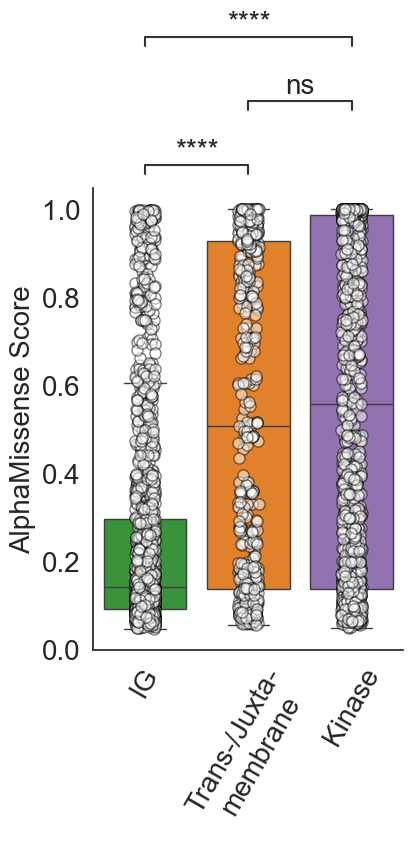

In [31]:
fig, ax = plt.subplots(figsize=(4, 6))
g = sns.boxplot(data=df_merged_all, x='region', y='am_pathogenicity',
                ax=ax, palette=color_dict_region, order=t, showfliers=False)
g1 = sns.stripplot(data=df_merged_all, x='region', y='am_pathogenicity',
                   ax=ax, color='white', alpha=.5, order=t, edgecolor='black',
                   size=8, linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("AlphaMissense Score", fontsize=20)
ax.set_xlabel("", fontsize=20)

box_pairs = [
    (t[0], t[1]),
    (t[0], t[2]),
    (t[1], t[2])
]

from statannotations.Annotator import Annotator

annotator = Annotator(ax, box_pairs, data=df_merged_all,
                      x='region', y='am_pathogenicity', order=t)

annotator.configure(
    test="t-test_ind",                 
    text_format="star",           
    loc="outside",
    fontsize=20,
    comparisons_correction="bonferroni", 
)

annotator.apply_and_annotate()

plt.xticks(ticks=[0,1,2], labels=['IG', 'Trans-/Juxta-\nmembrane', 'Kinase'], rotation=60)
plt.savefig('figures/ext_4c.pdf',
            bbox_inches='tight')
plt.show()

## Extended Figure 4d

Box plot of the flank sizes of KIT variants, stratified by different functional domains.

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

IG vs. Trans-/Juxta-membrane: t-test independent samples with Bonferroni correction, P_val:0.000e+00 t=-5.730e+01
Trans-/Juxta-membrane vs. Kinase: t-test independent samples with Bonferroni correction, P_val:3.401e-70 t=1.847e+01
IG vs. Kinase: t-test independent samples with Bonferroni correction, P_val:2.640e-232 t=-3.533e+01


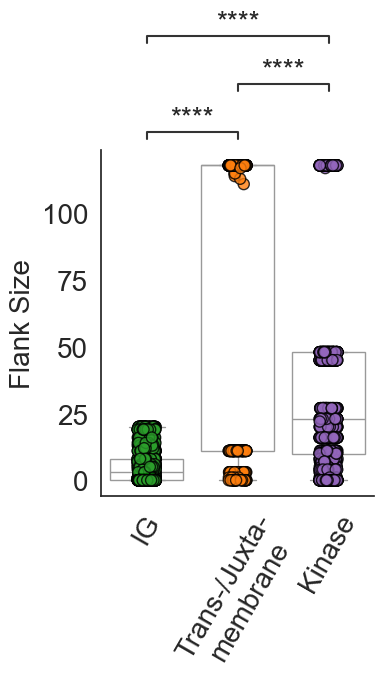

In [32]:
fig, ax = plt.subplots(figsize=(4, 6))
g = sns.boxplot(data=df_merged_all, x='region', y='flank_size',
                ax=ax, color='white', order=t, showfliers=False)  # hide fliers for clarity
g1 = sns.stripplot(data=df_merged_all, x='region', y='flank_size',
                   ax=ax, palette=color_dict_region, order=t,
                   edgecolor='black', size=8, linewidth=1, alpha=0.8)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Flank Size", fontsize=20)
ax.set_xlabel("", fontsize=20)

box_pairs = [
    (t[0], t[1]),
    (t[0], t[2]),
    (t[1], t[2]),
]

annotator = Annotator(ax, box_pairs,
                      data=df_merged_all, x='region', y='flank_size', order=t)

annotator.configure(
    test="t-test_ind",              
    text_format="star",             
    loc="outside",
    fontsize=20,
    comparisons_correction="bonferroni", 
)

results = annotator.apply_and_annotate() 

plt.tight_layout()
plt.xticks(ticks=[0,1,2], labels=['IG', 'Trans-/Juxta-\nmembrane', 'Kinase'], rotation=60)
plt.savefig('figures/ext_4d.pdf',
            bbox_inches='tight')
plt.show()